# <center>Handwritten digits classification using neural network</center>

In [69]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [70]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [71]:
X_train=X_train/255
X_test=X_test/255

In [72]:
len(X_test)

10000

In [73]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

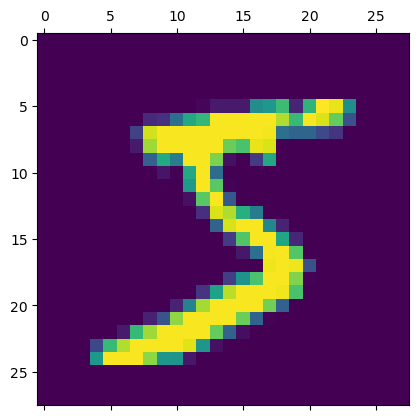

In [74]:
plt.matshow(X_train[0])

In [75]:
y_train[0]


5

In [76]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [77]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [91]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8112 - loss: 0.7273
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.9129 - loss: 0.3083
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.9204 - loss: 0.2841
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.9242 - loss: 0.2709
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - accuracy: 0.9254 - loss: 0.2668


In [79]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.9141 - loss: 0.3027


[0.26606690883636475, 0.9254999756813049]

In [80]:
model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step


array([[2.3038244e-02, 2.6069984e-07, 7.1077630e-02, ..., 9.9985701e-01,
        9.8928437e-02, 6.5999126e-01],
       [5.5091381e-01, 1.1535613e-02, 9.9919498e-01, ..., 1.7825596e-12,
        1.7625488e-01, 4.6039204e-09],
       [4.8291948e-04, 9.9370354e-01, 6.7908847e-01, ..., 1.5966472e-01,
        3.9543250e-01, 5.4535758e-02],
       ...,
       [4.2993665e-06, 3.4716270e-06, 1.7049494e-03, ..., 3.4153599e-01,
        5.4833508e-01, 7.7278280e-01],
       [1.4371122e-04, 2.3046760e-04, 1.3049300e-04, ..., 4.7028745e-05,
        6.7789543e-01, 1.1202443e-04],
       [8.2615977e-03, 5.5149624e-10, 1.9296530e-01, ..., 2.3707777e-08,
        2.6462611e-04, 1.1633579e-06]], dtype=float32)

In [81]:
y_predicted=model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step


In [82]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [83]:
y_predicted[0]

array([2.3038244e-02, 2.6069984e-07, 7.1077630e-02, 9.6853238e-01,
       2.2602137e-03, 1.3521418e-01, 1.4246390e-06, 9.9985701e-01,
       9.8928437e-02, 6.5999126e-01], dtype=float32)

In [84]:
np.argmax(y_predicted[0])

7

In [85]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    5,    5,    3,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   4,    9,  928,   16,    6,    4,   13,   12,   37,    3],
       [   3,    0,   17,  919,    0,   27,    3,   12,   22,    7],
       [   2,    1,    3,    2,  905,    0,   11,    4,   10,   44],
       [  10,    3,    3,   31,    7,  778,   16,    8,   29,    7],
       [  13,    3,    9,    1,    8,   11,  909,    2,    2,    0],
       [   1,    5,   22,    6,    4,    0,    0,  959,    3,   28],
       [   7,   10,    7,   21,    9,   27,    9,   14,  866,    4],
       [  10,    7,    1,    9,   23,    7,    0,   35,    6,  911]])>

Text(95.72222222222221, 0.5, 'Truth')

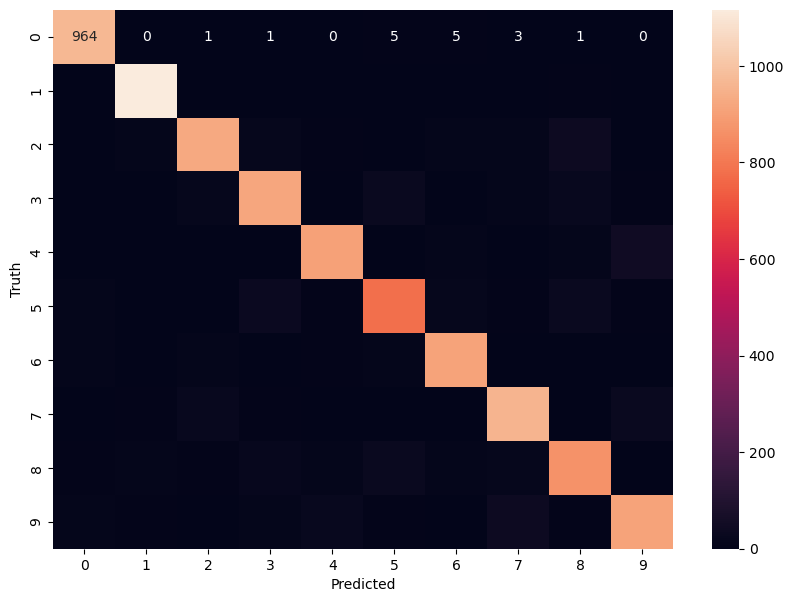

In [86]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using the hidden layer


In [87]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8753 - loss: 0.4516
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9638 - loss: 0.1227
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9753 - loss: 0.0824
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9802 - loss: 0.0662
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9868 - loss: 0.0446


In [88]:

model.evaluate(X_test_flattened,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.9714 - loss: 0.0906


[0.0757344514131546, 0.9764000177383423]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

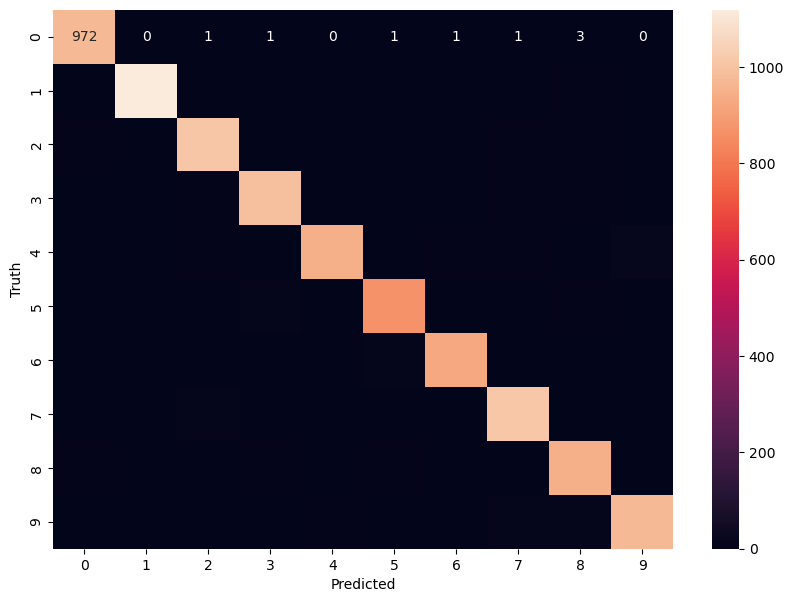

In [89]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')